In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

import tensorflow as tf
import keras as kr
from sklearn.model_selection import train_test_split

import os 
from os import getcwd
from os.path import dirname,abspath
import pathlib as pl

import sys

home_path = "C:\\sebin\\ecg"
git_path = home_path+"\\ecg_data_wfdb"

sys.path.append(git_path)
from use.segment.pick import random_ecg
from use.segment.open import ecgtodf
from use.tensor.input import x_tensor_input,y_tensor_input

from sklearn.preprocessing import MinMaxScaler

In [2]:
test_folder = home_path+"\\save"+"\\"+"lab_data"+"\\"+"no_p"

In [3]:
#ecgdf length 확인

In [4]:
test_data = pd.DataFrame(ecgtodf(test_folder,288))

0.csv
1.csv
10.csv
11.csv
12.csv
13.csv
14.csv
15.csv
16.csv
17.csv
18.csv
19.csv
2.csv
20.csv
21.csv
22.csv
23.csv
24.csv
25.csv
26.csv
27.csv
28.csv
29.csv
3.csv
30.csv
31.csv
32.csv
33.csv
34.csv
35.csv
36.csv
37.csv
38.csv
39.csv
4.csv
40.csv
41.csv
42.csv
43.csv
44.csv
45.csv
46.csv
47.csv
48.csv
49.csv
5.csv
50.csv
51.csv
52.csv
53.csv
54.csv
55.csv
56.csv
57.csv
58.csv
59.csv
6.csv
60.csv
61.csv
62.csv
63.csv
64.csv
65.csv
66.csv
67.csv
68.csv
69.csv
7.csv
70.csv
71.csv
72.csv
73.csv
74.csv
75.csv
76.csv
77.csv
78.csv
79.csv
8.csv
80.csv
9.csv


In [5]:
test_data

,0,1,2,3,4,5,6,7,8,9,...,278,279,280,281,282,283,284,285,286,287
0,1195.31,1195.31,1209.38,1209.38,1223.44,1209.38,1350.00,1335.94,1350.00,1364.06,...,1420.31,1420.31,1420.31,1420.31,1420.31,1406.25,1406.25,1406.25,1406.25,1406.25
1,1195.31,1181.25,1195.31,1209.38,1209.38,1293.75,1307.81,1321.88,1321.88,1335.94,...,1420.31,1420.31,1434.37,1448.44,1448.44,1420.31,1420.31,1420.31,1406.25,1420.31
2,1293.75,1307.81,1307.81,1307.81,1307.81,1293.75,1293.75,1307.81,1307.81,1307.81,...,1237.50,1237.50,1237.50,1251.56,1251.56,1251.56,1251.56,1265.62,1251.56,1265.62
3,1321.88,1321.88,1321.88,1321.88,1321.88,1321.88,1321.88,1335.94,1321.88,1335.94,...,1139.06,1153.12,1153.12,1167.19,1181.25,1181.25,1195.31,1195.31,1181.25,1181.25
4,1167.19,1167.19,1167.19,1181.25,1167.19,1167.19,1167.19,1181.25,1167.19,1181.25,...,1237.50,1237.50,1237.50,1251.56,1251.56,1251.56,1265.62,1265.62,1279.69,1293.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1265.62,1265.62,1279.69,1279.69,1279.69,1265.62,1265.62,1279.69,1279.69,1279.69,...,1223.44,1223.44,1223.44,1237.50,1223.44,1237.50,1237.50,1237.50,1237.50,1237.50
77,1279.69,1279.69,1279.69,1293.75,1293.75,1279.69,1279.69,1279.69,1279.69,1293.75,...,1195.31,1209.38,1209.38,1209.38,1209.38,1209.38,1223.44,1223.44,1237.50,1237.50
78,1265.62,1265.62,1251.56,1251.56,1251.56,1265.62,1265.62,1265.62,1265.62,1265.62,...,1279.69,1279.69,1279.69,1293.75,1293.75,1307.81,1307.81,1293.75,1279.69,1293.75
79,1279.69,1279.69,1293.75,1279.69,1265.62,1279.69,1279.69,1279.69,1293.75,1279.69,...,1195.31,1181.25,1195.31,1209.38,1209.38,1209.38,1223.44,1223.44,1209.38,1223.44


In [6]:
test_data.shape

(81, 288)

In [7]:
def to_mixmax_tensor(x):
    
    record = x.to_numpy()
    t_record = record.T

    scaler = MinMaxScaler()
    scaler.fit(t_record)

    after_record = scaler.transform(t_record).T


    record = pd.DataFrame(after_record)
    x=x_tensor_input(record)


    return x

In [8]:
test_data = to_mixmax_tensor(test_data)

In [9]:
print(test_data.shape)

(81, 288, 1)


In [10]:
test_data

array([[[0.05713957],
        [0.05713957],
        [0.06666847],
        ...,
        [0.19999865],
        [0.19999865],
        [0.19999865]],

       [[0.04504337],
        [0.03603598],
        [0.04504337],
        ...,
        [0.18918728],
        [0.18017989],
        [0.18918728]],

       [[0.13043613],
        [0.13913022],
        [0.13913022],
        ...,
        [0.11304176],
        [0.10434766],
        [0.11304176]],

       ...,

       [[0.12389085],
        [0.12389085],
        [0.11504286],
        ...,
        [0.14159314],
        [0.13274514],
        [0.14159314]],

       [[0.12389637],
        [0.12389637],
        [0.13274431],
        ...,
        [0.0884983 ],
        [0.07965036],
        [0.0884983 ]],

       [[0.11927036],
        [0.11927036],
        [0.11927036],
        ...,
        [0.05504886],
        [0.05504886],
        [0.0642215 ]]])

In [11]:
test_data.shape

(81, 288, 1)

In [12]:
model = kr.models.load_model(git_path+"\\test\\02\\07\\model02.h5")

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 286, 8)            32        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 143, 8)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 141, 16)           400       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 70, 16)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 68, 32)            1568      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 34, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 32, 32)            3

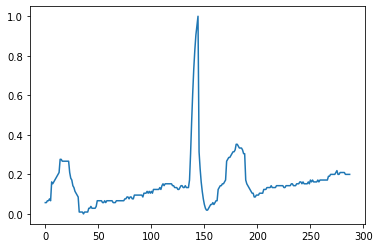

In [14]:
plt.plot(test_data[0])

In [15]:
predict = model.predict(test_data)

In [16]:
print(predict)

[[8.84269834e-01 1.08530233e-03 5.70007444e-07 1.14644378e-01
  1.00990376e-20]
 [6.75885333e-03 3.41853523e-03 1.04074124e-02 9.79415178e-01
  1.64377748e-13]
 [9.99999285e-01 4.34591300e-07 2.15035328e-07 6.12682385e-08
  1.24232939e-20]
 [9.99999523e-01 1.76380127e-07 3.19427187e-08 3.34547281e-07
  3.58853891e-20]
 [9.99994755e-01 5.23799326e-06 6.23444019e-10 2.27893846e-08
  6.53076916e-22]
 [9.99498606e-01 1.28269685e-05 4.82851814e-04 5.78942490e-06
  5.20528216e-18]
 [9.99999881e-01 1.02897445e-07 4.21843502e-08 2.97737817e-08
  6.04249430e-22]
 [9.99998689e-01 5.24692041e-07 3.40813671e-07 3.97575462e-07
  1.49443064e-19]
 [9.99994874e-01 5.07411778e-06 9.37262179e-09 4.77045958e-09
  1.46412180e-21]
 [9.99999642e-01 3.03838789e-07 7.92248489e-09 3.46101592e-10
  8.51590533e-25]
 [9.99999881e-01 5.21329611e-08 2.77053029e-08 8.24006676e-08
  3.07629827e-20]
 [9.99999642e-01 3.42742283e-07 5.75025396e-08 2.57920814e-08
  7.66341317e-21]
 [1.46962032e-02 4.42611473e-03 9.620420

In [17]:
output = []

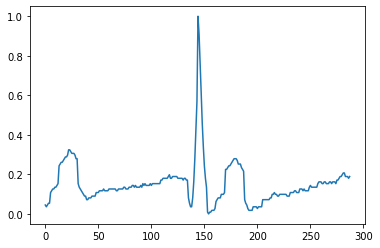

In [18]:
plt.plot(test_data[1])

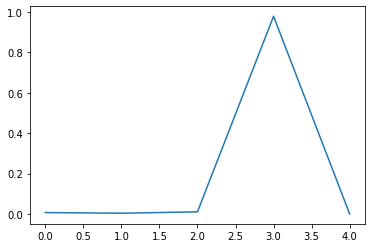

In [19]:
plt.plot(predict[1])

In [20]:
for i in range(len(predict)):
    if np.argmax(predict[i])!=0:
        print(i,np.argmax(predict[i]))
    
    output.append(np.argmax(predict[i]))

1 3
12 2
23 1


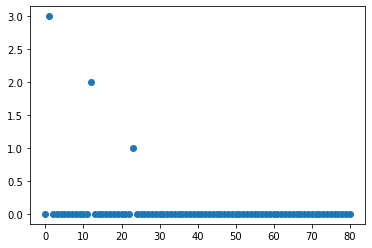

In [21]:
plt.plot(output,"o")

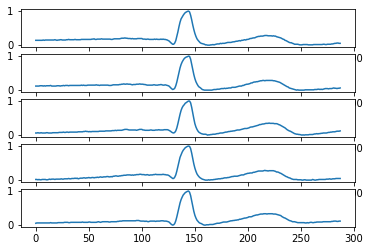

In [22]:
plt.subplot(5,1,1)
plt.plot(test_data[3])
plt.subplot(5,1,2)
plt.plot(test_data[80])
plt.subplot(5,1,3)
plt.plot(test_data[30])
plt.subplot(5,1,4)
plt.plot(test_data[45])
plt.subplot(5,1,5)
plt.plot(test_data[51])


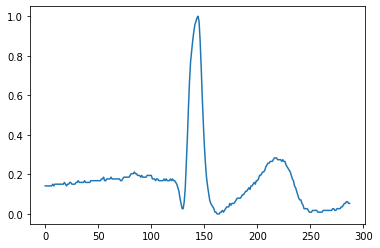

In [23]:
plt.plot(test_data[3])

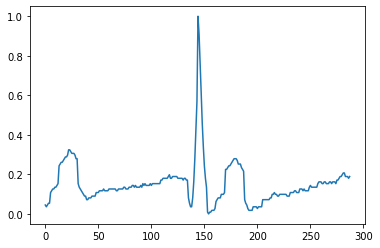

In [24]:
plt.plot(test_data[1])

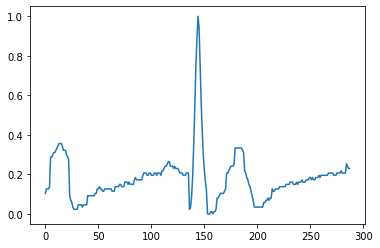

In [25]:
plt.plot(test_data[12])

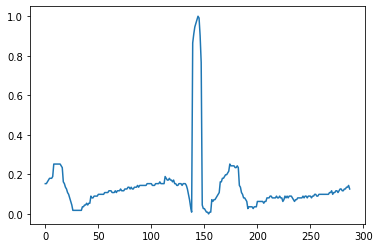

In [26]:
plt.plot(test_data[23])

In [27]:
for i in range(5):
    print(output.count(i))

78
1
1
1
0
